# Обработка данных, полученных с программы
## 1000000x300

In [1]:
# Импротируем необходимые функции
import numpy as np # работа с массивами и линейной алгеброй
import matplotlib.pyplot as plt # для отрисовки графиков
import pandas as pd # для чтения и работы с данными
from scipy.optimize import curve_fit # фитирующая процедура

In [2]:
def psi_f(x):
    return np.exp(-x**2/2)/np.sqrt(np.sqrt(np.pi))

def integrate_hist(hist, bin_edges):
    integral = 0
    for i in range(len(hist)):
        integral += hist[i]*(bin_edges[i+1] - bin_edges[i])
    return integral

def distr(df):
    pedestrians, bin_edges = np.histogram(df, bins = 1000)
    #print bin_edges
    
    width = bin_edges[1] - bin_edges[0]
    plt.figure(figsize=(7,7))
    plt.bar(bin_edges[:-1], pedestrians, width = width)
    plt.xlabel('Ось x'.decode('utf-8'))
    plt.ylabel('Количество пешеходов (N)'.decode('utf-8'))
    plt.title('Распределение пешеходов по оси'.decode('utf-8'))
    plt.legend()
    plt.show()
    
    pedestrians_sq = pedestrians*pedestrians
    norm = integrate_hist(pedestrians_sq, bin_edges)
    psi_sq = pedestrians_sq/norm
    psi = pedestrians/np.sqrt(norm)

    plt.figure(figsize=(7,7))
    plt.bar(bin_edges[:-1], psi, width = width)
    plt.xlabel('x'.decode('utf-8'))
    plt.ylabel('$\psi(x)$'.decode('utf-8'))
    plt.title(''.decode('utf-8'))
    ###
    x = np.arange(-4, 4, 0.1)
    plt.plot(x, psi_f(x), color = 'black', label = '$\psi(x)$, теоретическая'.decode('utf-8'))
    plt.legend()
    plt.show()
    
    plt.figure(figsize=(7,7))
    plt.bar(bin_edges[:-1], psi_sq, width = width)
    plt.xlabel('x'.decode('utf-8'))
    plt.ylabel('$\psi^2(x)$'.decode('utf-8'))
    plt.title('Плотность вероятности'.decode('utf-8'))
    plt.plot(x, psi_f(x)**2, color = 'black', label = '$\psi^2(x)$, теоретическая'.decode('utf-8'))
    plt.legend()
    plt.show()

In [3]:
frame = pd.read_csv('..\data_output\output(1000000x300)\output.csv')
frame.head()

,x
0,0.897498
1,-0.027136
2,0.713403
3,-0.517432
4,-0.069983


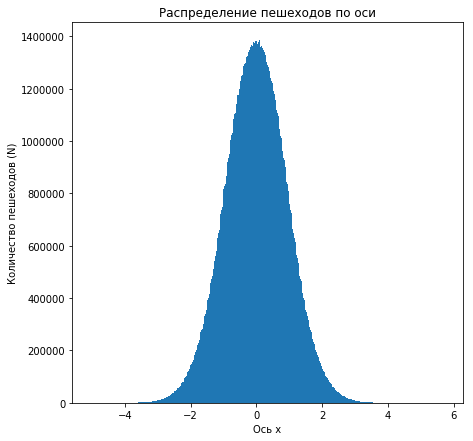

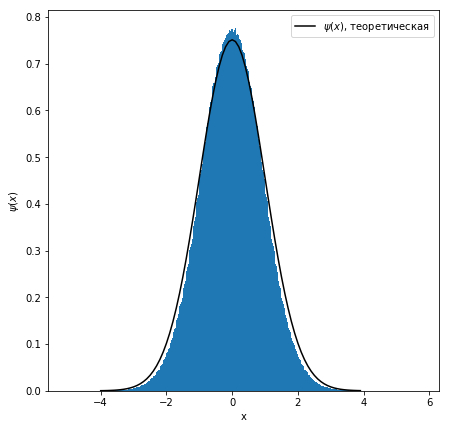

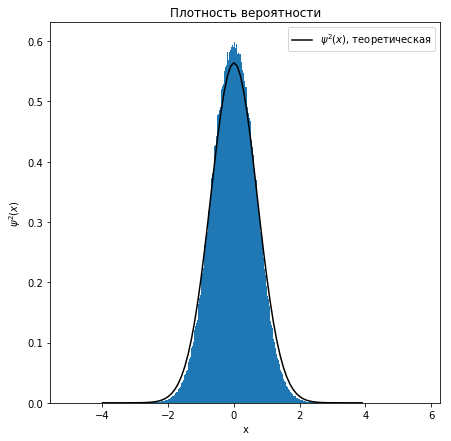

In [4]:
distr(frame)

In [5]:
def drawNE(df):
    plt.figure(figsize=(20,7))
    plt.scatter(np.arange(df.shape[0]), df['N'], linewidths=0.1, label = 'Количество пешеходов'.decode('utf-8') )
    plt.xlabel('Номер итерации'.decode('utf-8'))
    plt.ylabel('Количество пешеходов (N)'.decode('utf-8'))
    plt.title('Зависимость N от итерации'.decode('utf-8'))
    plt.legend()
    plt.grid()
    plt.show()
    
    plt.figure(figsize=(20,8))
    plt.plot(np.arange(df.shape[0]), df['E'], label = 'Данные'.decode('utf-8'))
    plt.xlabel('Номер итерации'.decode('utf-8'))
    plt.ylabel('E'.decode('utf-8'))
    plt.title('Зависимость энергии от итерации'.decode('utf-8'))
    plt.legend()
    plt.grid()
    plt.show()
    
    plt.figure(figsize=(20,8))
    plt.plot(np.arange(df.shape[0]), df['E_r'], label = 'Данные'.decode('utf-8'))
    plt.xlabel('Номер итерации'.decode('utf-8'))
    plt.ylabel('E_r'.decode('utf-8'))
    plt.title('Зависимость опорного потенциала от итерации'.decode('utf-8'))
    plt.legend()
    plt.grid()
    plt.show()

In [12]:
frameNE = pd.read_csv('..\data_output\output(1000000x300)\outputNE.csv')

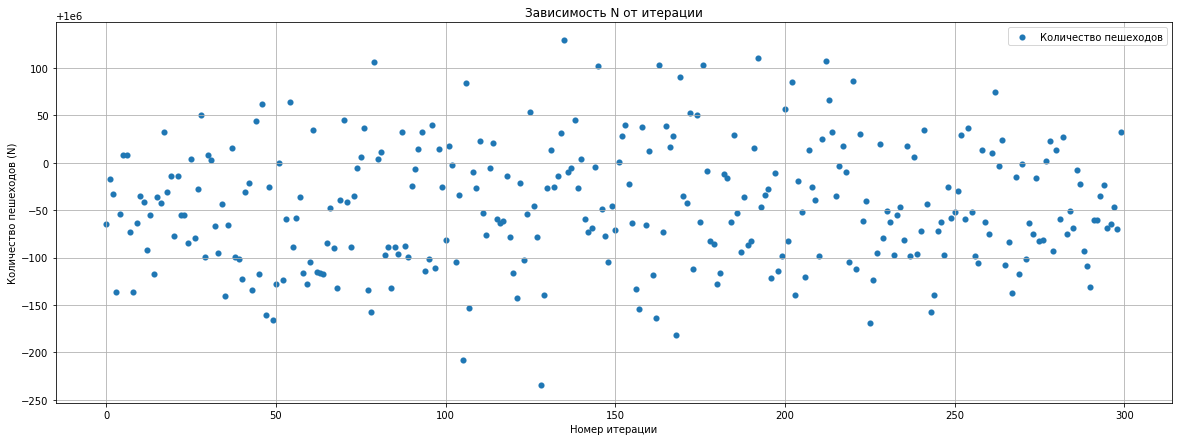

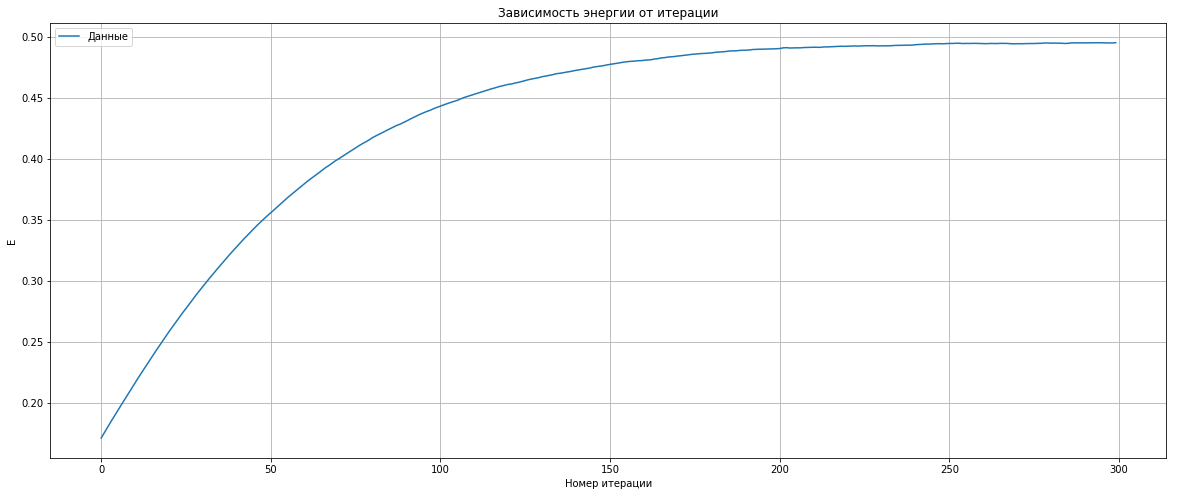

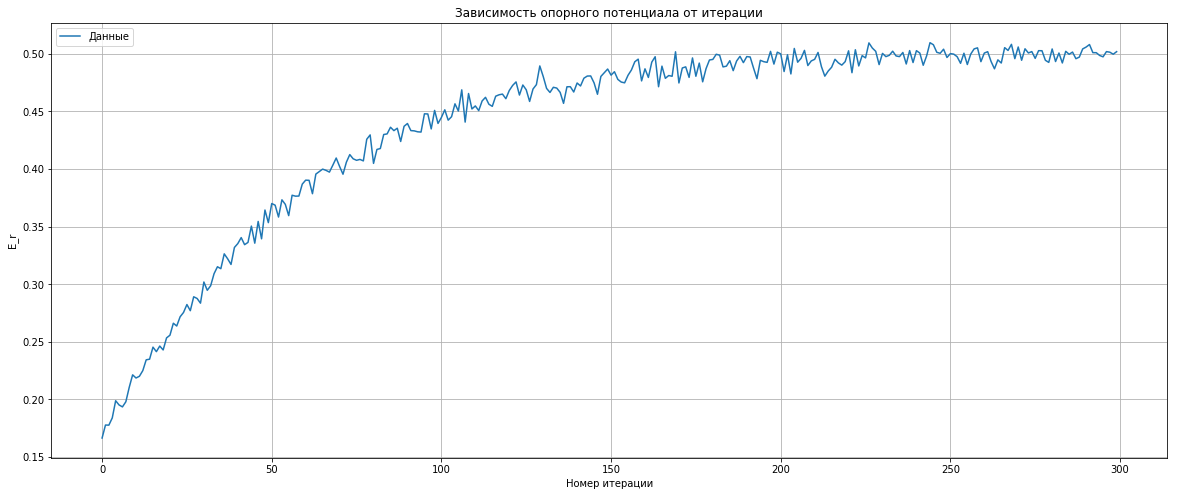

In [13]:
drawNE(frameNE)

In [14]:
def one_hist(df, num, frame_av, frameNE):
    pedestrians, bin_edges = np.histogram(df, 1000)
    pedestrians_sq = pedestrians*pedestrians
    norm = integrate_hist(pedestrians_sq, bin_edges)
    psi_sq = pedestrians_sq/norm
    psi = pedestrians/np.sqrt(norm)
    
    x = np.arange(-4, 4, 0.1)

    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,10), dpi = 200)
    ax[0][0].bar(bin_edges[:-1], psi_sq, width = bin_edges[1]-bin_edges[0])
    ax[0][0].set_xlabel('x'.decode('utf-8'))
    ax[0][0].set_ylabel('$\psi^2(x)$'.decode('utf-8'))
    ax[0][0].set_title('Плотность вероятности'.decode('utf-8'))
    ax[0][0].plot(x, psi_f(x)**2, color = 'black', label = '$\psi^2(x)$, теоретическая'.decode('utf-8'))
    ax[0][0].set_title('Усреднение по итерациям'.decode('utf-8') + "[" + str((num-1)*frame_av + 1).decode('utf-8') + ":" + str((num)*frame_av).decode('utf-8') + "]")
    ax[0][0].legend()
    ax[0][0].set_ylim(0,1)
    ax[0][0].set_xlim(-4,4)
    
    ax[1][0].bar(bin_edges[:-1], psi, width = bin_edges[1]-bin_edges[0])
    ax[1][0].set_xlabel('x'.decode('utf-8'))
    ax[1][0].set_ylabel('$\psi(x)$'.decode('utf-8'))
    ax[1][0].set_title('Плотность вероятности'.decode('utf-8'))
    ax[1][0].plot(x, psi_f(x), color = 'black', label = '$\psi^2(x)$, теоретическая'.decode('utf-8'))
    ax[1][0].set_title('Усреднение по итерациям'.decode('utf-8') + "[" + str((num-1)*frame_av + 1).decode('utf-8') + ":" + str((num)*frame_av).decode('utf-8') + "]")
    ax[1][0].legend()
    ax[1][0].set_ylim(0,1)
    ax[1][0].set_xlim(-4,4)
    
    ax[0][1].plot(np.arange(frameNE[0:num*frame_av]['E'].shape[0]), frameNE[0:num*frame_av]['E'], label = 'Данные'.decode('utf-8'))
    ax[0][1].set_xlabel('Номер итерации'.decode('utf-8'))
    ax[0][1].set_ylabel('E'.decode('utf-8'))
    ax[0][1].set_title('Зависимость энергии от итерации'.decode('utf-8'))
    ax[0][1].set_xlim(0,300)
    ax[0][1].set_ylim(0,1)
    ax[0][1].legend()
    ax[0][1].grid()
    
    ax[1][1].scatter(np.arange(frameNE[0:num*frame_av]['N'].shape[0]), frameNE[0:num*frame_av]['N'], linewidths=0.1, label = 'Количество пешеходов'.decode('utf-8') )
    ax[1][1].set_xlabel('Номер итерации'.decode('utf-8'))
    ax[1][1].set_ylabel('Количество пешеходов (N)'.decode('utf-8'))
    ax[1][1].set_title('Зависимость N от итерации'.decode('utf-8'))
    ax[1][1].set_xlim(0,300)
    ax[1][1].legend()
    ax[1][1].grid()
    
    path = './gif/'+'hist'+str(num)+'.png'
    
    fig.savefig(path)
    plt.close()
    
    
frame_av = 1
right = 0
for i in range(frameNE['N'].shape[0]/frame_av):
    left = right
    right += frameNE['N'][i*frame_av:(i+1)*frame_av].sum()
    one_hist(frame[int(left):int(right)], i + 1, frame_av, frameNE)